<a href="https://colab.research.google.com/github/JulienJ-44/rakuteam/blob/main/11_bis_Vote_3_mod%C3%A8les_ypred_proba_text_0_82_img_0_55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [327]:
# Connection au google drive 
from google.colab import drive
drive.mount('/Drive')
pathSaveCsv = '/Drive/My Drive'

Mounted at /Drive


In [278]:
#dataframe de correspondances prdtypecode/libellé
tab_designation = {}

tab_code_designation = {'prdtypecode':
                                  (2583,1560,1300,2060,2522,1280,2403,2280,1920,1160,
                                  1320,10,2705,1140,2582,40,2585,1302,1281,50,2462,2905,
                                  60,2220,1301,1940,1180),
                    'désignation':('PISCINE & ACCESSOIRES',
                                  'MAISON: cusine, mobiliers',
                                  'JOUETS RADIO COMMANDES',               
                                  'LUMINAIRES, DECO',
                                  'FOURNITURE de BUREAU',
                                  'JOUETS ENFANTS',
                                  'LIVRES & MAGASINES: histoire, musées',
                                  "REVUES d'ARTS et SPECTACLES",
                                  "LITERIE, TEXTILE MAISON",
                                  "CARTES à COLLECTIONNER",
                                  "ACCESSOIRES BEBES",
                                  "LITTERATURE/ROMANS (occasions?)",
                                  "ROMAN: livre histoire?",
                                  "FIGURINES MANGAS",
                                  "MOBILIER & ACCESSOIRES extérieur",
                                  "JEUX VIDEOS (import?)",
                                  "OUTILS JARDINS",
                                  "LOISIRS/EQUIPEMENT extérieur",
                                  "JEUX EDUCATIFS ENFANTS",
                                  "ACCESSOIRES CONSOLES de JEUX",
                                  "JEUX VIDEOS OCCASIONS",
                                  "JEUX PC",
                                  "CONSOLES de JEUX",
                                  "ACCESSOIRES ANIMAUX",
                                  "VETEMENTS ENFANTS/BEBE",
                                  "ALIMENTATIONS, CONFISERIES, CAFE",
                                  "JEUX DE GUERRE sur TABLE")}

df_code_designation = pd.DataFrame(tab_code_designation)
df_code_designation = df_code_designation.sort_values('prdtypecode')
df_code_designation["code_0a26"]=df_code_designation['prdtypecode']
df_code_designation = df_code_designation.replace({'code_0a26': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})
df_code_designation

,prdtypecode,désignation,code_0a26
11,10,LITTERATURE/ROMANS (occasions?),1
15,40,JEUX VIDEOS (import?),19
19,50,ACCESSOIRES CONSOLES de JEUX,3
22,60,CONSOLES de JEUX,20
13,1140,FIGURINES MANGAS,12
9,1160,CARTES à COLLECTIONNER,17
26,1180,JEUX DE GUERRE sur TABLE,14
5,1280,JOUETS ENFANTS,4
18,1281,JEUX EDUCATIFS ENFANTS,9
2,1300,JOUETS RADIO COMMANDES,15


In [279]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import requests
import io

In [295]:
# télécharger tous les fichiers csv y_pred
url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_RandomForest_Global_score0_74.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_pred_proba_rf = pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_DnnText_score0_82.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_pred_proba_dnntext = pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_train.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_train = pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/ypred_proba_Image_score_0_55_correct.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_pred_proba_img = pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_test.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_test = pd.read_csv(io.StringIO(download.decode('utf-8')))
# Remplacer les labels de 0 à 26
y_test = y_test.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})

In [296]:
model_index = input("Select a model: 1-RF, 2-CNN image, 3-DNN texte, default-weighted voting")
print(model_index)
if (model_index == "1"):
  y_pred_proba = y_pred_proba_rf
  model_selected="Random Forest"
elif (model_index == "2"):
  y_pred_proba = y_pred_proba_img
  model_selected="CNN images"
elif (model_index == "3"):
  y_pred_proba = y_pred_proba_dnntext
  model_selected="DNN texte"
else:
  score1_rf = 0.74
  score2_dnntext = 0.82
  score3_img = 0
  y_pred_proba = (score1_rf * y_pred_proba_rf + score2_dnntext * y_pred_proba_dnntext + score3_img * y_pred_proba_img) / (score1_rf + score2_dnntext + score3_img)
  model_selected="weighted voting"
print("Selection: ", model_selected)

Select a model: 1-RF, 2-CNN image, 3-DNN texte, default-weighted voting

Selection:  weighted voting


In [297]:
# Drop les colonnes inutiles
try:
    y_pred_proba = y_pred_proba.drop('Unnamed: 0', axis =1)
except:
  print("(1)no columns Unnamed: 0")
try:
  y_test = y_test.drop('Unnamed: 0', axis =1)
except:
  print("(2)no columns Unnamed: 0")
  
#preparation des données pour le crosstab
# Convertir Dataframe en array
y_pred_proba_arr = y_pred_proba.to_numpy()
y_test = y_test.to_numpy()
# on prend l'index de la proba la + élevée
# pour récupérer les classes
y_pred = y_pred_proba_arr.argmax(axis=1)
y_pred
# Pour ajouter une dimension en plus
y_pred = np.reshape(y_pred, (-1, 1))

In [298]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

#print("Accuracy:",accuracy_score(y_test.ravel(), y_pred.ravel()))
#print("Précision de la prédiction:", metrics.accuracy_score(y_test, y_pred)*100, '%')
print("Evaluation détaillée de la Classification :\n \n" ,
      (metrics.classification_report(y_test, y_pred)))

Evaluation détaillée de la Classification :
 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       154
           1       0.50      0.69      0.58       601
           2       0.85      0.88      0.86       964
           3       0.84      0.84      0.84       341
           4       0.72      0.73      0.73       944
           5       0.76      0.75      0.76       536
           6       0.93      0.92      0.92       993
           7       0.79      0.67      0.72       524
           8       0.84      0.82      0.83       967
           9       0.62      0.55      0.58       415
          10       0.90      0.92      0.91       866
          11       0.81      0.77      0.79       979
          12       0.76      0.76      0.76       552
          13       0.96      0.98      0.97      2045
          14       0.65      0.62      0.63       139
          15       0.95      0.96      0.95      1006
          16       0.81      0.81 

In [3]:
# y_test = y_test.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
#        1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
#        2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})

In [299]:
# Crosstab avec ravel pr enlever dimension et eviter message d'erreur (Error: If using all scalar values, you must pass an index)
dfcross = pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['Classe réelle'], colnames=['Classe prédite'],normalize = 0) #TODO remettre ,normalize = 0
dfcross = dfcross.sort_index(axis=0)
dfcross = dfcross.sort_index(axis=1)
dfcross.columns = df_code_designation['désignation']
dfcross.index = df_code_designation['désignation']

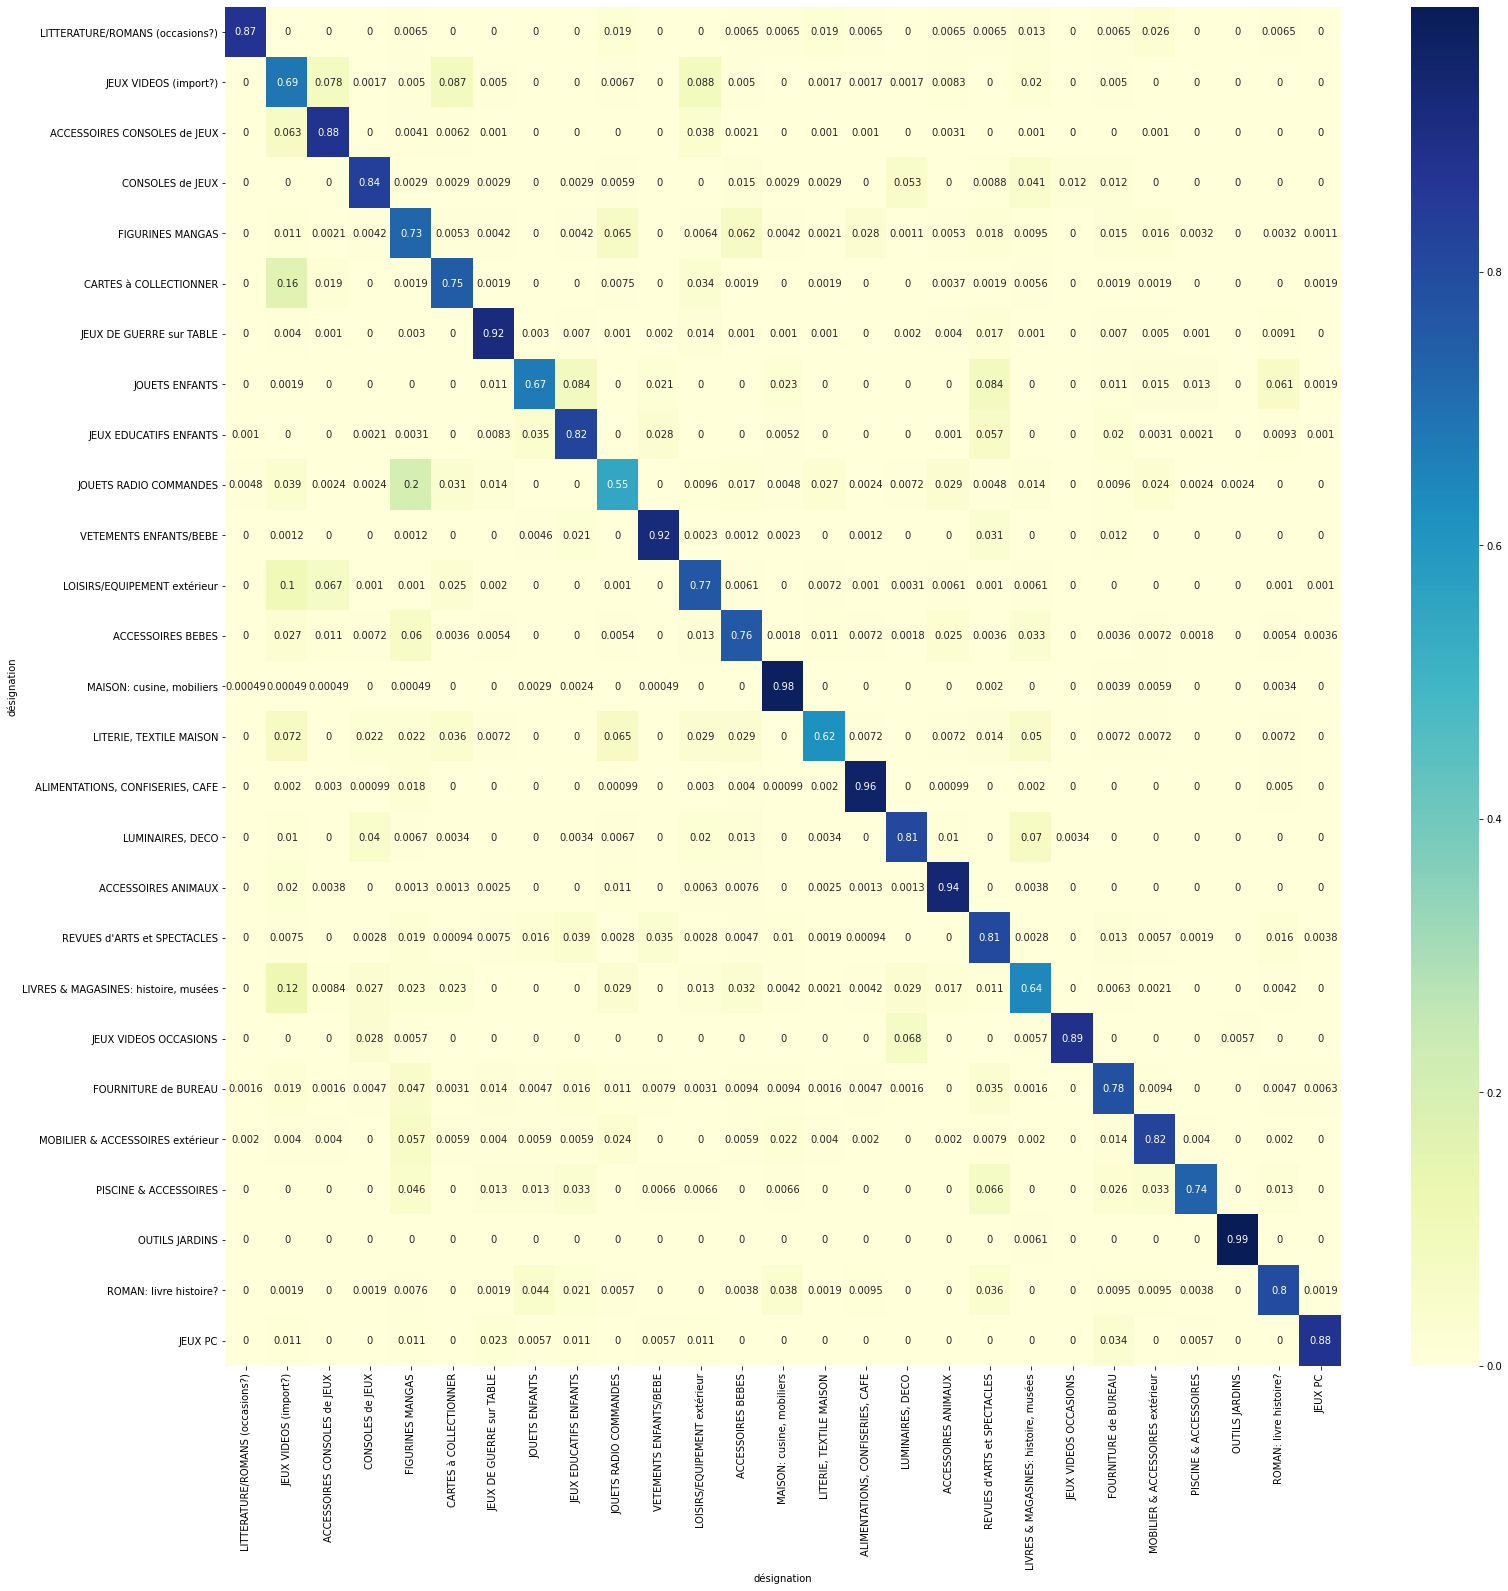

In [300]:
import seaborn as sns
# Matrice de confusion
plt.figure(figsize=(25,25))
g = sns.heatmap(dfcross,  annot=True, cmap="YlGnBu");
plt.xticks(rotation=90);

In [301]:
#chargement de ytest et des features pour récuérer l'échantillon d articles tests utilisé pour les modèles
url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/y_pred_proba/y_test.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
y_test_analyse = pd.read_csv(io.StringIO(download.decode('utf-8')), index_col=0)

url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/Features/data_features_final.csv"# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content
data_features = pd.read_csv(io.StringIO(download.decode('utf-8')))
#on garde que les données avec label (on exclut la partie X_test challenge)
data_features = data_features.dropna(subset=['prdtypecode_x'])

# Drop le Unnamed
try:
    data_features = data_features.drop('Unnamed: 0', axis =1)
except:
  print("(1)no columns Unnamed: 0")
try:
    data_features = data_features.drop('prdtypecode_y', axis =1)
except:
  print("(1)no columns prdtypecode_y")

# on regénère les mêmes échantillons que pour les modèles
X_train, X_test, y_train, y_test = train_test_split(data_features, data_features['prdtypecode_x'], test_size = 0.2, random_state = 123)
y_test_analyse['prédiction'] = y_pred
X_test=X_test.sort_index(axis=0)
#y_test_analyse=y_test_analyse.sort_index(axis=0)
#y_pred=y_pred.sort(axis=0)
y_test_analyse = y_test_analyse.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})


In [302]:
y_test_analyse.head()

,prdtypecode,prédiction
77312,7,7
74413,1,1
33548,21,21
59073,13,13
25604,13,13


In [303]:
y_pred

array([[ 7],
       [ 1],
       [21],
       ...,
       [18],
       [13],
       [13]])

In [288]:
X_test.head()

,designation,description,productid,prdtypecode_x,desi_nb_phrases,desc_nb_phrases,best_idf,class_10.0,class_40.0,class_50.0,class_60.0,class_1140.0,class_1160.0,class_1180.0,class_1280.0,class_1281.0,class_1300.0,class_1301.0,class_1302.0,class_1320.0,class_1560.0,class_1920.0,class_1940.0,class_2060.0,class_2220.0,class_2280.0,class_2403.0,class_2462.0,class_2522.0,class_2582.0,class_2583.0,class_2585.0,class_2705.0,class_2905.0,desc_nb2chiffres+,desi_num,desc_num,desc_poids,desc_long,desc_vol,desc_ans_mois,desc_pieces,blanc,noir,R,G,B
2,grand stylet ergonomique bleu gamepad nintendo...,pilot style touch pen marque speedlink stylet ...,201115110,50.0,1,1,class_2462.0,0.0,0.1,0.48,0.0,0.000,0.0,0.0,0.000,0.275,0.0,0.000,0.0,0.144,0.0,0.0,0.26,0.0,0.0,0.000,0.625,0.657,0.297,0.0,0.000,0.0,0.0,0.02,1,0,0,0,0,0,0,0,0.925060,0.000000,249.340400,251.500820,253.409132
8,puzzle scooby-doo poster 2x35 pieces,NaN,4239126071,1280.0,1,0,class_1280.0,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.168,0.109,0.0,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0.237921,0.000475,132.736420,129.140784,118.494112
10,eames inspired sxw chair pink black,timeless dsw seat paired types legs wood legs ...,1915836983,1560.0,1,1,2583,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0.765783,0.000147,239.517540,231.495720,232.638864
20,kit désinfection piscines enfants 20990,NaN,3936362802,2583.0,1,0,class_2583.0,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.328,0.339,0.0,0.166,0.0,0.105,0.0,0.0,0.00,0.0,0.0,0.096,0.000,0.000,0.000,0.0,0.868,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0.459121,0.005839,191.914832,205.177432,211.476028
23,véhicule star wars a-ast5,véhicule vintage saga star wars a-ast5,279822475,1140.0,1,1,class_1140.0,0.0,0.0,0.00,0.0,0.396,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0.258199,0.000368,230.182492,201.138248,173.808544


In [381]:
Global_df_analysis = pd.concat([X_test.drop("prdtypecode_x", axis=1),y_test_analyse], axis = 1)
ligne_erreur = Global_df_analysis[Global_df_analysis['prdtypecode']!=Global_df_analysis['prédiction']]
ligne_erreur.info()
#Quasiment 50% des erreurs de classfication correspondent à des articles à description vide! => amléiorer features RF sur designations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 51 to 84829
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   designation        2850 non-null   object 
 1   description        1484 non-null   object 
 2   productid          2850 non-null   int64  
 3   desi_nb_phrases    2850 non-null   int64  
 4   desc_nb_phrases    2850 non-null   int64  
 5   best_idf           2850 non-null   object 
 6   class_10.0         2850 non-null   float64
 7   class_40.0         2850 non-null   float64
 8   class_50.0         2850 non-null   float64
 9   class_60.0         2850 non-null   float64
 10  class_1140.0       2850 non-null   float64
 11  class_1160.0       2850 non-null   float64
 12  class_1180.0       2850 non-null   float64
 13  class_1280.0       2850 non-null   float64
 14  class_1281.0       2850 non-null   float64
 15  class_1300.0       2850 non-null   float64
 16  class_1301.0       285

In [306]:
#dfcross_notnorm = pd.crosstab(y_test.ravel(), y_pred.ravel(), rownames=['Classe réelle'], colnames=['Classe prédite']) #TODO remettre ,normalize = 0
dfcross_notnorm = pd.crosstab(y_test_analyse.prdtypecode, y_test_analyse.prédiction, rownames=['Classe réelle'], colnames=['Classe prédite']) #TODO remettre ,normalize = 0
dfcross_notnorm = dfcross_notnorm.sort_index(axis=0)
dfcross_notnorm = dfcross_notnorm.sort_index(axis=1)
dfcross_notnorm.columns = df_code_designation['désignation']
dfcross_notnorm.index = df_code_designation['désignation']
dfcross_notnorm


désignation,LITTERATURE/ROMANS (occasions?),JEUX VIDEOS (import?),ACCESSOIRES CONSOLES de JEUX,CONSOLES de JEUX,FIGURINES MANGAS,CARTES à COLLECTIONNER,JEUX DE GUERRE sur TABLE,JOUETS ENFANTS,JEUX EDUCATIFS ENFANTS,JOUETS RADIO COMMANDES,VETEMENTS ENFANTS/BEBE,LOISIRS/EQUIPEMENT extérieur,ACCESSOIRES BEBES,"MAISON: cusine, mobiliers","LITERIE, TEXTILE MAISON","ALIMENTATIONS, CONFISERIES, CAFE","LUMINAIRES, DECO",ACCESSOIRES ANIMAUX,REVUES d'ARTS et SPECTACLES,"LIVRES & MAGASINES: histoire, musées",JEUX VIDEOS OCCASIONS,FOURNITURE de BUREAU,MOBILIER & ACCESSOIRES extérieur,PISCINE & ACCESSOIRES,OUTILS JARDINS,ROMAN: livre histoire?,JEUX PC
désignation,,,,,,,,,,,,,,,,,,,,,,,,,,,
LITTERATURE/ROMANS (occasions?),134,0,0,0,1,0,0,0,0,3,0,0,1,1,3,1,0,1,1,2,0,1,4,0,0,1,0
JEUX VIDEOS (import?),0,412,47,1,3,52,3,0,0,4,0,53,3,0,1,1,1,5,0,12,0,3,0,0,0,0,0
ACCESSOIRES CONSOLES de JEUX,0,61,846,0,4,6,1,0,0,0,0,37,2,0,1,1,0,3,0,1,0,0,1,0,0,0,0
CONSOLES de JEUX,0,0,0,285,1,1,1,0,1,2,0,0,5,1,1,0,18,0,3,14,4,4,0,0,0,0,0
FIGURINES MANGAS,0,10,2,4,689,5,4,0,4,61,0,6,59,4,2,26,1,5,17,9,0,14,15,3,0,3,1
CARTES à COLLECTIONNER,0,88,10,0,1,403,1,0,0,4,0,18,1,0,1,0,0,2,1,3,0,1,1,0,0,0,1
JEUX DE GUERRE sur TABLE,0,4,1,0,3,0,909,3,7,1,2,14,1,1,1,0,2,4,17,1,0,7,5,1,0,9,0
JOUETS ENFANTS,0,1,0,0,0,0,6,352,44,0,11,0,0,12,0,0,0,0,44,0,0,6,8,7,0,32,1
JEUX EDUCATIFS ENFANTS,1,0,0,2,3,0,8,34,797,0,27,0,0,5,0,0,0,1,55,0,0,19,3,2,0,9,1


In [307]:
cm = dfcross_notnorm
df = pd.DataFrame()

i=0
j=0
ClassVrai = []
ClassPredite = []
Erreurs = []
for i in range(len(cm)):
    for j in range(len(cm.columns)):
        if i != j:
            #if cm.iloc[i,j] > 0.05:
                ClassVrai.append(cm.index[i])
                ClassPredite.append(cm.columns[j])
                Erreurs.append(cm.iloc[i,j])
        
df = pd.DataFrame({'Classe réelle' : ClassVrai,
                    'Classe prédite' : ClassPredite,
                    '#Erreurs' : Erreurs
                    })         

In [308]:
df=df.sort_values(by='#Erreurs',ascending=False)
df.head(10)
#df_sorted[df_sorted['Classe réelle']=='FIGURINES MANGAS']

,Classe réelle,Classe prédite,#Erreurs
287,LOISIRS/EQUIPEMENT extérieur,JEUX VIDEOS (import?),102
131,CARTES à COLLECTIONNER,JEUX VIDEOS (import?),88
238,JOUETS RADIO COMMANDES,FIGURINES MANGAS,84
288,LOISIRS/EQUIPEMENT extérieur,ACCESSOIRES CONSOLES de JEUX,66
53,ACCESSOIRES CONSOLES de JEUX,JEUX VIDEOS (import?),61
112,FIGURINES MANGAS,JOUETS RADIO COMMANDES,61
115,FIGURINES MANGAS,ACCESSOIRES BEBES,59
495,"LIVRES & MAGASINES: histoire, musées",JEUX VIDEOS (import?),57
225,JEUX EDUCATIFS ENFANTS,REVUES d'ARTS et SPECTACLES,55
36,JEUX VIDEOS (import?),LOISIRS/EQUIPEMENT extérieur,53


In [309]:
df.groupby('Classe réelle').sum().sort_values(by='#Erreurs',ascending=False)

,#Erreurs
Classe réelle,
FIGURINES MANGAS,255
LOISIRS/EQUIPEMENT extérieur,229
REVUES d'ARTS et SPECTACLES,206
JEUX VIDEOS (import?),189
JOUETS RADIO COMMANDES,187
JOUETS ENFANTS,172
JEUX EDUCATIFS ENFANTS,170
"LIVRES & MAGASINES: histoire, musées",169
FOURNITURE de BUREAU,138


In [310]:
df.groupby('Classe prédite').sum().sort_values(by='#Erreurs',ascending=False)

,#Erreurs
Classe prédite,
JEUX VIDEOS (import?),412
FIGURINES MANGAS,264
REVUES d'ARTS et SPECTACLES,236
LOISIRS/EQUIPEMENT extérieur,173
JEUX EDUCATIFS ENFANTS,152
ACCESSOIRES CONSOLES de JEUX,147
JOUETS RADIO COMMANDES,139
ACCESSOIRES BEBES,135
CARTES à COLLECTIONNER,127


In [311]:
dfcross_norm = pd.crosstab(y_test_analyse.prdtypecode, y_test_analyse.prédiction, rownames=['Classe réelle'], colnames=['Classe prédite'],normalize = 0) #TODO remettre ,normalize = 0
dfcross_norm = dfcross_norm.sort_index(axis=0)
dfcross_norm = dfcross_norm.sort_index(axis=1)
dfcross_norm.columns = df_code_designation['désignation']
dfcross_norm.index = df_code_designation['désignation']
dfcross_norm

cm = dfcross_norm
df = pd.DataFrame()

i=0
j=0
ClassVrai = []
ClassPredite = []
Erreurs = []
for i in range(len(cm)):
    for j in range(len(cm.columns)):
        if i != j:
            #if cm.iloc[i,j] > 0.05:
                ClassVrai.append(cm.index[i])
                ClassPredite.append(cm.columns[j])
                Erreurs.append(cm.iloc[i,j]*100)
        
df = pd.DataFrame({'Classe réelle' : ClassVrai,
                    'Classe prédite' : ClassPredite,
                    '#Erreurs %' : Erreurs
                    })         
df=df.sort_values(by='#Erreurs %',ascending=False)
df.head(10)
#df_sorted[df_sorted['Classe réelle']=='FIGURINES MANGAS']

,Classe réelle,Classe prédite,#Erreurs %
238,JOUETS RADIO COMMANDES,FIGURINES MANGAS,20.240964
131,CARTES à COLLECTIONNER,JEUX VIDEOS (import?),16.417910
495,"LIVRES & MAGASINES: histoire, musées",JEUX VIDEOS (import?),12.000000
287,LOISIRS/EQUIPEMENT extérieur,JEUX VIDEOS (import?),10.418795
36,JEUX VIDEOS (import?),LOISIRS/EQUIPEMENT extérieur,8.818636
30,JEUX VIDEOS (import?),CARTES à COLLECTIONNER,8.652246
189,JOUETS ENFANTS,JEUX EDUCATIFS ENFANTS,8.396947
199,JOUETS ENFANTS,REVUES d'ARTS et SPECTACLES,8.396947
27,JEUX VIDEOS (import?),ACCESSOIRES CONSOLES de JEUX,7.820300
365,"LITERIE, TEXTILE MAISON",JEUX VIDEOS (import?),7.194245


In [385]:
indexrow=0 #select which row of dataframe above you want to investigate
classe_reelle_code=df_code_designation[df_code_designation["désignation"]==df.iloc[indexrow,0]]["prdtypecode"]
classe_reelle_code026=(df_code_designation[df_code_designation["désignation"]==df.iloc[indexrow,0]]).code_0a26
classe_predite_code=df_code_designation[df_code_designation["désignation"]==df.iloc[indexrow,1]]["prdtypecode"]
classe_predite_code026=df_code_designation[df_code_designation["désignation"]==df.iloc[indexrow,1]].code_0a26

import pickle

# reading the dictionnary des 15 keyword
with open(f'{pathSaveCsv}/dico_keywords_tfidf_15.pkl', 'rb') as handle: 
  data = handle.read() 
# reconstructing the data as dictionary 
lst_keywords_byclass = pickle.loads(data) 

print("Classe:",classe_reelle_code, " ", df.iloc[indexrow,0])
print(lst_keywords_byclass[int(classe_reelle_code)])
print("Classe:",classe_predite_code, " ", df.iloc[indexrow,1])
print(lst_keywords_byclass[int(classe_predite_code)])
#df_comparekeywords[classe_reelle_code]=lst_keywords_byclass[int(classe_reelle_code)]
df_comparekeywords=pd.DataFrame(index=np.arange(15))
df_comparekeywords[classe_reelle_code]=[key for key in lst_keywords_byclass[int(classe_reelle_code)]]
df_comparekeywords[classe_predite_code]=[key for key in lst_keywords_byclass[int(classe_predite_code)]]
print("\nErreur %:", df.iloc[indexrow,2])
print(df_comparekeywords.head(15))

print("\nExemples d'articles avec cette erreur de classification:")
ligne_erreur_1 = ligne_erreur[((ligne_erreur.prdtypecode==int(classe_reelle_code026)) & (ligne_erreur.prédiction==int(classe_predite_code026)))]
ligne_erreur_1.head(10)

Classe: 2    1300
Name: prdtypecode, dtype: int64   JOUETS RADIO COMMANDES
{'générique': 0.603, 'rc': 0.338, 'drone': 0.312, 'dji': 0.241, 'quadcopter': 0.157, 'mavic': 0.143, 'avion': 0.128, 'fpv': 0.127, 'caméra': 0.119, 'maquette': 0.118, 'voiture': 0.112, 'wifi': 0.108, 'car': 0.089, 'pro': 0.089, 'batterie': 0.085}
Classe: 13    1140
Name: prdtypecode, dtype: int64   FIGURINES MANGAS
{'figurine': 0.641, 'pop': 0.329, 'star': 0.202, 'wars': 0.194, 'funko': 0.182, 'shirt': 0.155, 'cm': 0.154, 'figure': 0.128, 'pvc': 0.125, 'marvel': 0.115, 'figurines': 0.097, 'gundam': 0.092, 'dragon': 0.09, 'mug': 0.087, 'japan': 0.084}

Erreur %: 20.240963855421686
          1300       1140
0    générique   figurine
1           rc        pop
2        drone       star
3          dji       wars
4   quadcopter      funko
5        mavic      shirt
6        avion         cm
7          fpv     figure
8       caméra        pvc
9     maquette     marvel
10     voiture  figurines
11        wifi     gundam


,designation,description,productid,desi_nb_phrases,desc_nb_phrases,best_idf,class_10.0,class_40.0,class_50.0,class_60.0,class_1140.0,class_1160.0,class_1180.0,class_1280.0,class_1281.0,class_1300.0,class_1301.0,class_1302.0,class_1320.0,class_1560.0,class_1920.0,class_1940.0,class_2060.0,class_2220.0,class_2280.0,class_2403.0,class_2462.0,class_2522.0,class_2582.0,class_2583.0,class_2585.0,class_2705.0,class_2905.0,desc_nb2chiffres+,desi_num,desc_num,desc_poids,desc_long,desc_vol,desc_ans_mois,desc_pieces,blanc,noir,R,G,B,prdtypecode,prédiction
791,figurine plomb 54 mm fusilliers anglais 1809 m...,NaN,2590169268,1,0,class_1140.0,0.000,0.099,0.0,0.0,0.641,0.0,0.171,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.096,0.0,0.0,0.193,0.0,0.0,0.147,0.000,0.00,0,0,0,0,0,0,0,0,0.411196,0.002359,199.549120,184.884148,171.729536,15,12
23595,1/20 maschinen krieger series antigravity armo...,1/20 maschinen krieger series antigravity armo...,3894179351,1,1,class_1301.0,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.167,0.0,0.120,0.0,0.0,0.148,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.00,1,0,0,0,0,0,0,0,0.717489,0.000315,214.950560,218.982908,222.535804,15,12
25208,lancia kappa 2.0 turbo 1994 blue metal neo 449...,NaN,1324930980,1,0,class_1320.0,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.144,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.085,0.0,0.0,0.000,0.000,0.00,0,0,0,0,0,0,0,0,0.398495,0.000344,170.311372,173.245928,179.548208,15,12
35586,petits soldats ww2 ww ii commando us rambo vie...,NaN,285370797,1,0,class_2220.0,0.117,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.373,0.000,0.0,0.0,0.193,0.0,0.0,0.147,0.301,0.02,0,0,0,0,0,0,0,0,0.231552,0.000008,197.974224,191.191720,176.180128,15,12


Data type before reconstruction :  <class 'bytes'>
Data type after reconstruction :  <class 'dict'>
{2583.0: {'piscine': 0.58, 'kit': 0.288, 'bâche': 0.243, 'spa': 0.194, 'pompe': 0.161, 'bulles': 0.154, 'intex': 0.148, 'cm': 0.137, 'ronde': 0.123, 'acier': 0.12, 'gonflable': 0.12, 'filtration': 0.111, 'gré': 0.111, 'filtre': 0.106, 'bois': 0.106}, 1560.0: {'cm': 0.271, 'matelas': 0.224, 'cuisine': 0.222, 'table': 0.172, 'chaise': 0.164, 'blanc': 0.157, 'bois': 0.15, 'tissu': 0.146, 'rangement': 0.141, 'salle': 0.128, 'fournitures': 0.123, 'design': 0.115, 'sommier': 0.115, 'gris': 0.114, 'pieds': 0.113}, 1300.0: {'générique': 0.603, 'rc': 0.338, 'drone': 0.312, 'dji': 0.241, 'quadcopter': 0.157, 'mavic': 0.143, 'avion': 0.128, 'fpv': 0.127, 'caméra': 0.119, 'maquette': 0.118, 'voiture': 0.112, 'wifi': 0.108, 'car': 0.089, 'pro': 0.089, 'batterie': 0.085}, 2060.0: {'led': 0.293, 'noël': 0.26, 'décoration': 0.229, 'lampe': 0.228, 'décor': 0.204, 'bricolage': 0.171, 'peinture': 0.161, 'l

In [312]:
df.groupby('Classe prédite').sum().sort_values(by='#Erreurs %',ascending=False)

,#Erreurs %
Classe prédite,
JEUX VIDEOS (import?),68.350324
FIGURINES MANGAS,55.661855
REVUES d'ARTS et SPECTACLES,40.548885
LOISIRS/EQUIPEMENT extérieur,30.011088
"LIVRES & MAGASINES: histoire, musées",28.911785
JOUETS RADIO COMMANDES,26.815993
JEUX EDUCATIFS ENFANTS,25.055645
CARTES à COLLECTIONNER,23.422163
ACCESSOIRES BEBES,22.698794


In [313]:
df.groupby('Classe réelle').sum().sort_values(by='#Erreurs %',ascending=False)

,#Erreurs %
Classe réelle,
JOUETS RADIO COMMANDES,45.060241
"LITERIE, TEXTILE MAISON",38.129496
"LIVRES & MAGASINES: histoire, musées",35.578947
JOUETS ENFANTS,32.824427
JEUX VIDEOS (import?),31.447587
FIGURINES MANGAS,27.012712
PISCINE & ACCESSOIRES,26.490066
CARTES à COLLECTIONNER,24.813433
ACCESSOIRES BEBES,23.731884
